In [1]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [2]:
import rasterio 
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import cv2
import os
import copy
%matplotlib inline

In [3]:
band3 = rasterio.open("/content/drive/MyDrive/ColabNotebooks/LC08_L2SP_141045_20210516_20210525_02_T1_SR_B3.TIF")
band5 = rasterio.open("/content/drive/MyDrive/ColabNotebooks/LC08_L2SP_141045_20210516_20210525_02_T1_SR_B5.TIF")
band6 = rasterio.open("/content/drive/MyDrive/ColabNotebooks/LC08_L2SP_141045_20210516_20210525_02_T1_SR_B6.TIF")
band7 = rasterio.open("/content/drive/MyDrive/ColabNotebooks/LC08_L2SP_141045_20210516_20210525_02_T1_SR_B7.TIF")

In [5]:
green = band3.read(1).astype("float32")
nir = band5.read(1).astype("float32")
swir1 = band6.read(1).astype("float32")
swir2 = band7.read(1).astype("float32")

In [6]:
ndwi = np.where(
    (green+nir) == 0.,
    0,
    (green-nir)/(green+nir)
)

ndwisw1 = np.where(
    (green+swir1) == 0.,
    0,
    (green-swir1)/(green+swir1)
)

ndwisw2 = np.where(
    (green+swir2) == 0.,
    0,
    (green-swir2)/(green+swir2)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [7]:
ndwi_copy = copy.copy(ndwi)
ndwi_copy[ndwi>0] = -100

ndwisw1_copy = copy.copy(ndwisw1)
ndwisw1_copy[ndwisw1>0] = -100

ndwisw2_copy = copy.copy(ndwisw2)
ndwisw2_copy[ndwisw2>0] = -100

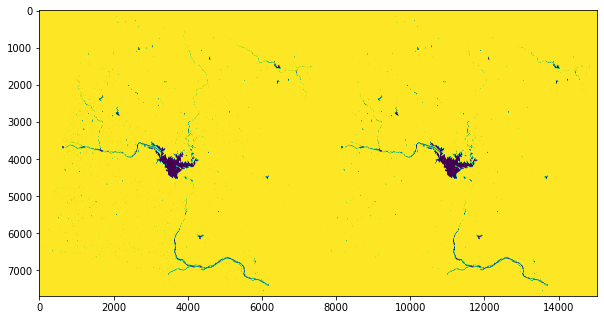

In [27]:
plt.figure(figsize=(10,10))
median_ndwi_copy = cv2.medianBlur(ndwi_copy, 5)
compare_ndwi_copy = cv2.hconcat([ndwi_copy, median_ndwi_copy])
plt.imshow(compare_ndwi_copy)

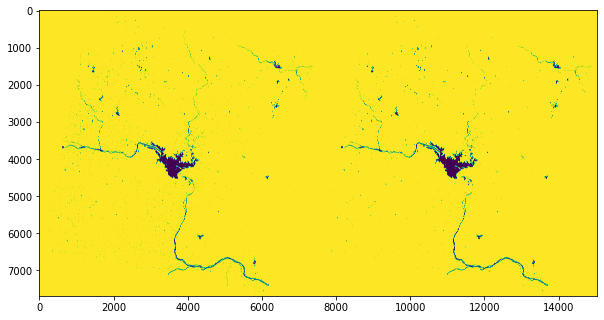

In [28]:
plt.figure(figsize=(10,10))
median_ndwisw1_copy = cv2.medianBlur(ndwisw1_copy, 5)
compare_ndwisw1_copy = cv2.hconcat([ndwisw1_copy, median_ndwisw1_copy])
plt.imshow(compare_ndwisw1_copy)

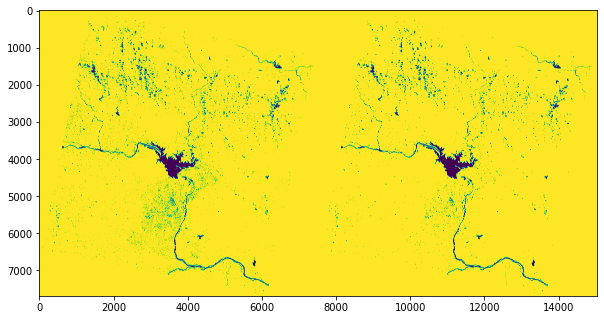

In [11]:
plt.figure(figsize=(10,10))
median_ndwisw2_copy = cv2.medianBlur(ndwisw2_copy, 5)
compare_ndwisw2_copy = cv2.hconcat([ndwisw2_copy, median_ndwisw2_copy])
plt.imshow(compare_ndwisw2_copy)

In [23]:
(len(np.where(ndwi_copy == -100)[0]) + len(np.where(ndwi_copy == -100)[1]))
np.where(ndwi_copy == -100)

(array([ 117,  157,  158, ..., 7593, 7594, 7598]),
 array([1781, 1958, 1958, ..., 5837, 5837, 5980]))

In [29]:
Area = 323
PixelAreaIR = (Area*(len(np.where(ndwi_copy == -100)[0]))/(ndwi_copy.shape[0]*ndwi_copy.shape[1]))
PixelAreaSWIR1 = (Area*(len(np.where(ndwisw1_copy == -100)[0]))/(ndwisw1_copy.shape[0]*ndwisw1_copy.shape[1]))
PixelAreaSWIR2 = (Area*(len(np.where(ndwisw2_copy == -100)[0]))/(ndwisw2_copy.shape[0]*ndwisw2_copy.shape[1]))

PixelMedianAreaIR = (Area*(len(np.where(median_ndwi_copy == -100)[0]))/(ndwi_copy.shape[0]*ndwi_copy.shape[1]))
PixelMedianAreaSWIR1 = (Area*(len(np.where(median_ndwisw1_copy == -100)[0]))/(ndwisw1_copy.shape[0]*ndwisw1_copy.shape[1]))
PixelMedianAreaSWIR2 = (Area*(len(np.where(median_ndwisw2_copy == -100)[0]))/(ndwisw2_copy.shape[0]*ndwisw2_copy.shape[1]))

print(PixelAreaIR, "KM")
print(PixelMedianAreaIR, "KM")

print(PixelAreaSWIR1, "KM")
print(PixelMedianAreaSWIR1, "KM")

print(PixelAreaSWIR2, "KM")
print(PixelMedianAreaSWIR2, "KM")

3.3909186207713016 KM
3.1232392062161805 KM
4.09051357105924 KM
3.6689060687717525 KM
7.941295564721472 KM
6.313888260618718 KM


In [30]:
ndwiImage = rasterio.open('/content/ndwiImage.tiff','w',driver='Gtiff',
                          width=band3.width, 
                          height = band3.height, 
                          count=1, crs=band3.crs, 
                          transform=band3.transform, 
                          dtype='float64')
ndwiImage.write(ndwi, 1)
ndwiImage.close()

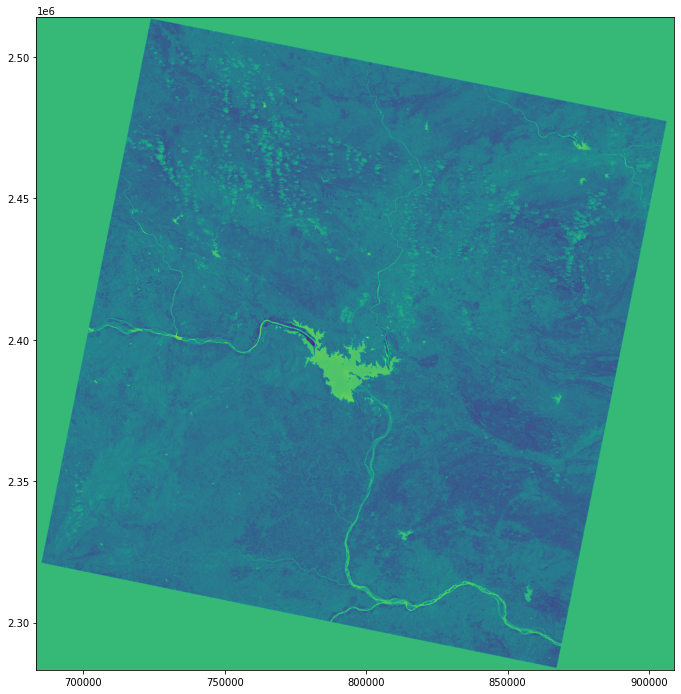

In [31]:
ndwi = rasterio.open('/content/ndwiImage.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndwi)